In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency, kruskal

from SSNHL.util import load_data

In [2]:
raw_data = load_data('../raw_data/all.xlsx', preprocess_func=None)
raw_data

,sex,age,ear,day of onset,time of onset,vertigo,ear blockage,tinnitus,hypertension,diabetes,...,weight,BMI,mean hearing threshold(affected side),curve type(affected side),mean hearing threshold(contralateral),curve type(contralateral),revive(affected side),ABR,otoacoustic emission (500-6000Hz),efficacy evaluation
id,,,,,,,,,,,,,,,,,,,,,
1,0,27,L,3,0,0,0,1,0,0,...,59.2,23.714148,24.0,1,16.0,0.0,0.0,0.0,0.0,3
2,1,44,R,20,2,1,1,1,0,0,...,63.0,22.589551,200.0,4,11.0,0.0,0.0,NaN,1.0,0
3,1,25,R,5,0,1,0,1,0,0,...,56.7,19.619377,58.0,2,13.0,0.0,0.0,1.0,1.0,1
4,1,33,L,45,2,0,0,1,0,0,...,72.3,22.564839,19.0,1,13.0,0.0,0.0,0.0,NaN,3
5,0,63,L,3,0,0,0,1,1,1,...,68.5,28.147600,63.0,2,200.0,4.0,0.0,1.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,1,33,L,6,0,0,1,1,0,0,...,73.4,22.159160,78.0,3,10.0,0.0,0.0,1.0,1.0,1
597,0,38,L,3,0,0,0,1,0,0,...,44.7,17.032465,18.0,1,11.0,0.0,0.0,0.0,0.0,3
598,0,43,R,7,0,1,0,1,0,0,...,63.8,25.556802,200.0,4,15.0,0.0,0.0,1.0,1.0,2


In [3]:
data = raw_data.copy()
data = data.fillna('-')

data.loc[data['efficacy evaluation'] == 0, 'efficacy evaluation'] = 'ineffective'
data.loc[data['efficacy evaluation'] == 1, 'efficacy evaluation'] = 'effective'
data.loc[data['efficacy evaluation'] == 2, 'efficacy evaluation'] = 'markedly effective'
data.loc[data['efficacy evaluation'] == 3, 'efficacy evaluation'] = 'cured'
data['efficacy evaluation'] = pd.Categorical(data['efficacy evaluation'], ['ineffective', 'effective', 'markedly effective', 'cured'])

data

,sex,age,ear,day of onset,time of onset,vertigo,ear blockage,tinnitus,hypertension,diabetes,...,weight,BMI,mean hearing threshold(affected side),curve type(affected side),mean hearing threshold(contralateral),curve type(contralateral),revive(affected side),ABR,otoacoustic emission (500-6000Hz),efficacy evaluation
id,,,,,,,,,,,,,,,,,,,,,
1,0,27,L,3,0,0,0,1,0,0,...,59.2,23.714148,24.0,1,16.0,0.0,0.0,0.0,0.0,cured
2,1,44,R,20,2,1,1,1,0,0,...,63.0,22.589551,200.0,4,11.0,0.0,0.0,-,1.0,ineffective
3,1,25,R,5,0,1,0,1,0,0,...,56.7,19.619377,58.0,2,13.0,0.0,0.0,1.0,1.0,effective
4,1,33,L,45,2,0,0,1,0,0,...,72.3,22.564839,19.0,1,13.0,0.0,0.0,0.0,-,cured
5,0,63,L,3,0,0,0,1,1,1,...,68.5,28.1476,63.0,2,200.0,4.0,0.0,1.0,1.0,markedly effective
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,1,33,L,6,0,0,1,1,0,0,...,73.4,22.15916,78.0,3,10.0,0.0,0.0,1.0,1.0,effective
597,0,38,L,3,0,0,0,1,0,0,...,44.7,17.032465,18.0,1,11.0,0.0,0.0,0.0,0.0,cured
598,0,43,R,7,0,1,0,1,0,0,...,63.8,25.556802,200.0,4,15.0,0.0,0.0,1.0,1.0,markedly effective


In [4]:
discrete_value_columns = data.columns[data.nunique() < 10].drop('efficacy evaluation')
consecutive_value_columns = data.columns[data.nunique() >= 10]

In [5]:
df = pd.DataFrame()
for column in discrete_value_columns:
    _data = data.copy()

    _df = pd.crosstab(_data[column], _data['efficacy evaluation'], rownames=['value']).reset_index()

    stat, p, dof, expected =  chi2_contingency(_df[_df.columns.drop('value')])
    _df['P'] = p

    for efficacy in _data['efficacy evaluation'].cat.categories:
        _proportion = (round(_df[efficacy] / _df[efficacy].sum() * 100, 2)).astype(str)
        _df[efficacy] = _df[efficacy].astype(str) + '(' + _proportion + '%)'

    _df['feature'] = column
    _df.set_index(['feature', 'value'], inplace=True)
    df = pd.concat([df, _df])
df.to_csv('../output/distribution/discrete_feature_distribution.csv')
df

efficacy evaluation                      ineffective   effective  \
feature                           value                            
sex                               0      154(50.66%)  41(53.95%)   
                                  1      150(49.34%)  35(46.05%)   
ear                               L      156(51.32%)  32(42.11%)   
                                  R      148(48.68%)  44(57.89%)   
time of onset                     0      132(43.42%)  50(65.79%)   
                                  1       52(17.11%)  16(21.05%)   
                                  2      120(39.47%)  10(13.16%)   
vertigo                           0      194(63.82%)  42(55.26%)   
                                  1      110(36.18%)  34(44.74%)   
ear blockage                      0      140(46.05%)  28(36.84%)   
                                  1      164(53.95%)  48(63.16%)   
tinnitus                          0        26(8.55%)    3(3.95%)   
                                  1      278(91.45%)  73(96.05%)   
hypertension                      0      236(77.63%)  65(85.53%)   
                                  1       68(22.37%)  11(14.47%)   
diabetes                          0      276(90.79%)  67(88.16%)   
                                  1        28(9.21%)   9(11.84%)   
tinnitus history                  0      289(95.07%)  76(100.0%)   
                                  1        15(4.93%)     0(0.0%)   
hearing loss history              0      263(86.51%)  74(97.37%)   
                                  1       41(13.49%)    2(2.63%)   
curve type(affected side)         1       51(16.78%)   8(10.53%)   
                                  2       37(12.17%)    7(9.21%)   
                                  3      134(44.08%)  31(40.79%)   
                                  4       82(26.97%)  30(39.47%)   
curve type(contralateral)         0      208(68.42%)  47(61.84%)   
                                  1         3(0.99%)    2(2.63%)   
                                  2       46(15.13%)  22(28.95%)   
                                  3        21(6.91%)    3(3.95%)   
                                  4        19(6.25%)    2(2.63%)   
                                  -          7(2.3%)     0(0.0%)   
revive(affected side)             0      188(61.84%)  56(73.68%)   
                                  1      100(32.89%)  18(23.68%)   
                                  -        16(5.26%)    2(2.63%)   
ABR                               0      149(49.01%)  30(39.47%)   
                                  1      137(45.07%)  44(57.89%)   
                                  -        18(5.92%)    2(2.63%)   
otoacoustic emission (500-6000Hz) 0       61(20.07%)  14(18.42%)   
                                  1      198(65.13%)  51(67.11%)   
                                  -        45(14.8%)  11(14.47%)   

efficacy evaluation                     markedly effective        cured  \
feature                           value                                   
sex                               0             41(44.09%)   81(63.78%)   
                                  1             52(55.91%)   46(36.22%)   
ear                               L             46(49.46%)   70(55.12%)   
                                  R             47(50.54%)   57(44.88%)   
time of onset                     0             76(81.72%)   103(81.1%)   
                                  1             10(10.75%)   14(11.02%)   
                                  2               7(7.53%)    10(7.87%)   
vertigo                           0             48(51.61%)  112(88.19%)   
                                  1             45(48.39%)   15(11.81%)   
ear blockage                      0             49(52.69%)   38(29.92%)   
                                  1             44(47.31%)   89(70.08%)   
tinnitus                          0               9(9.68%)   20(15.75%)   
                                  1             84(90.32%)  107(84.25%)   
hypertension      

In [6]:
df = pd.DataFrame()
for column in consecutive_value_columns:
    _data = data[data[column] != '-']

    _df = {}
    column_values = []
    for efficacy in _data['efficacy evaluation'].cat.categories:
        _column_values = _data.loc[_data['efficacy evaluation'] == efficacy, column]
        _df[efficacy] = '{}({}-{})'.format(round(_column_values.median(), 2), _column_values.min(), _column_values.max())
        column_values.append(_column_values)
    _df = pd.DataFrame([_df])

    stat, p = kruskal(*column_values)
    _df['P'] = p

    _df['feature'] = column
    _df.set_index('feature', inplace=True)
    df = pd.concat([df, _df])
df.to_csv('../output/distribution/consecutive_feature_distribution.csv')
df

,ineffective,effective,markedly effective,cured,P
feature,,,,,
age,50.0(18-84),46.5(18-69),51.0(19-72),38.0(18-75),8.509050e-09
day of onset,10.0(1-90),7.0(1-60),4.0(1-60),6.0(1-60),3.529544e-16
white blood cells,8.41(2.79-22.16),8.75(3.77-18.33),8.58(3.34-22.14),8.41(3.37-19.29),4.834182e-01
hemoglobin,136.5(50.0-172.0),140.0(78.0-177.0),140.0(89.0-178.0),136.0(76.0-180.0),6.306120e-01
platelet,246.0(136.0-545.0),262.0(97.0-384.0),252.0(57.0-548.0),263.0(152.0-1117.0),3.576524e-01
fibrinogen,2.61(0.46-8.18),2.48(1.0-4.87),2.55(0.52-5.22),2.37(0.56-4.62),3.074143e-02
cholesterol,5.16(2.47-8.88),5.3(3.54-9.1),5.19(3.3-8.59),4.94(3.4-7.48),4.454620e-02
height,1.62(1.41-1.85),1.62(1.43-1.86),1.65(1.41-1.82),1.61(1.42-1.82),4.945221e-01
weight,61.8(33.9-99.9),58.2(33.1-94.1),61.4(35.6-113.0),59.3(39.1-105.7),4.006211e-01


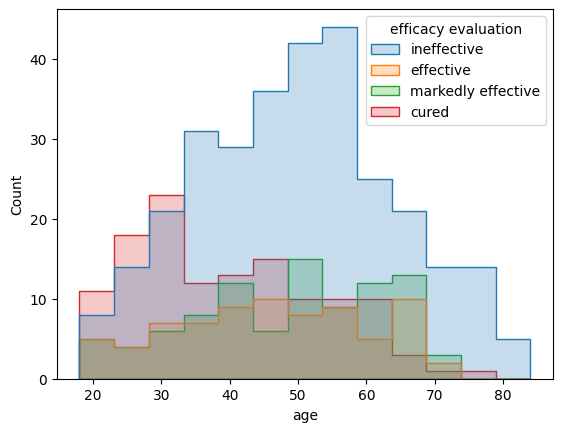

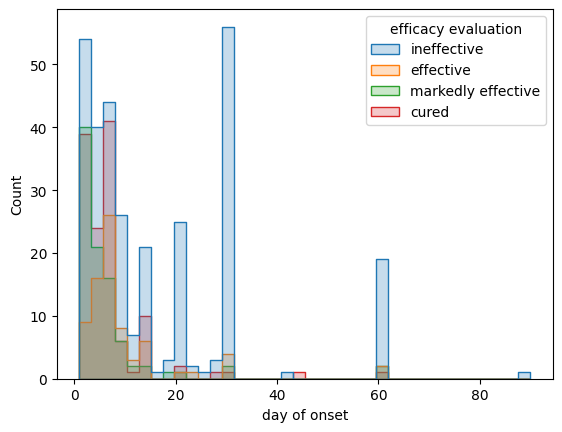

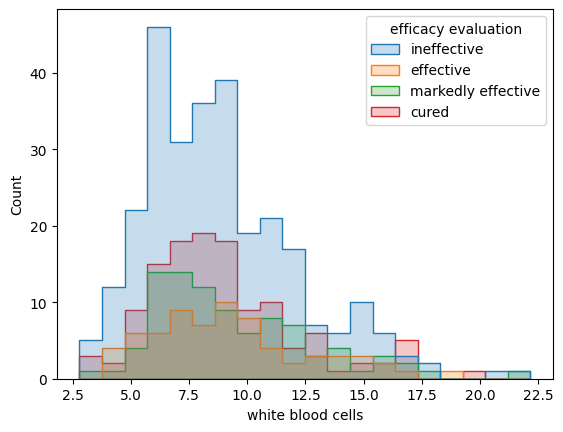

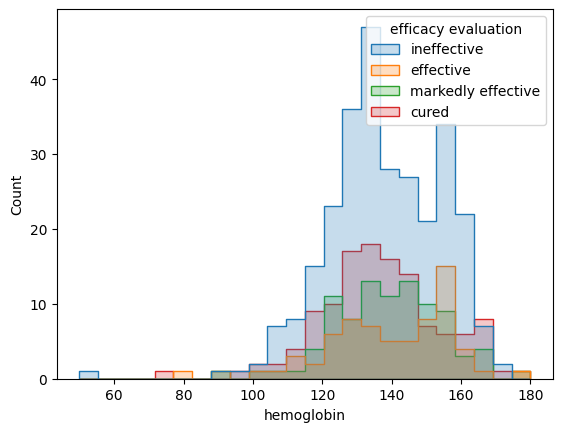

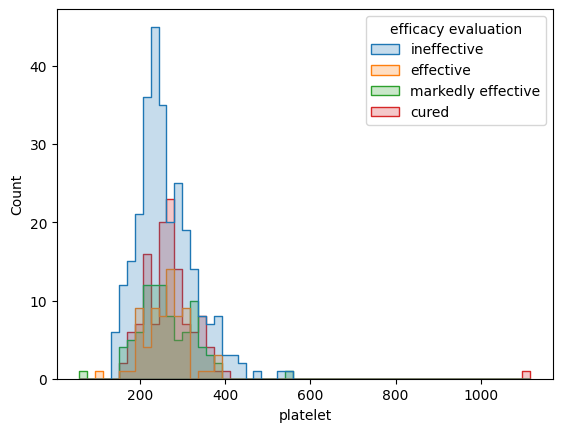

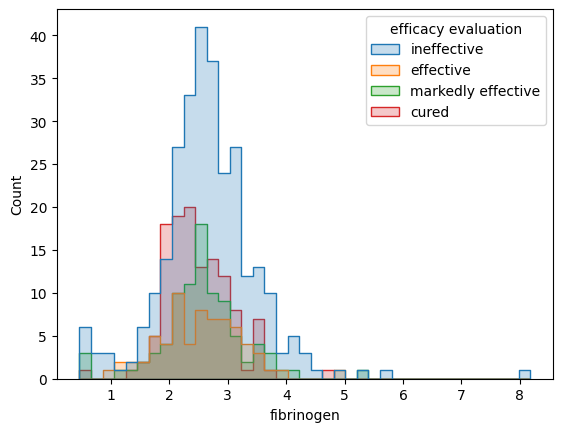

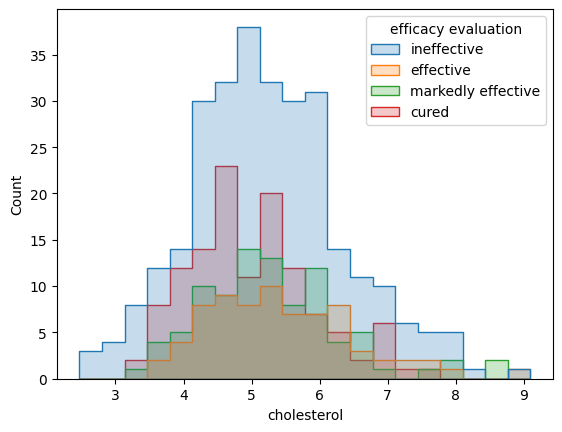

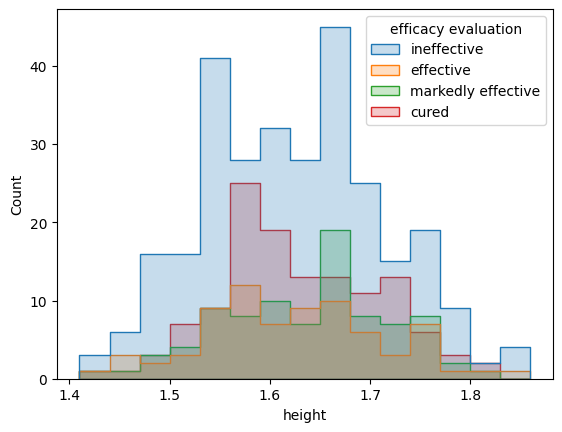

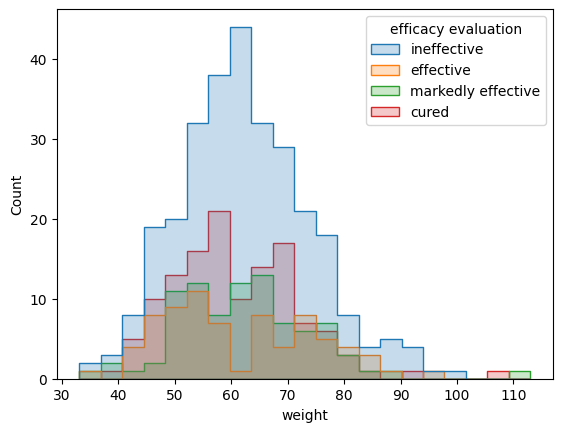

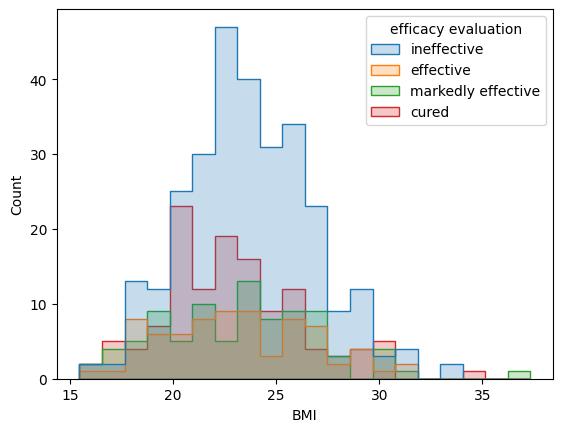

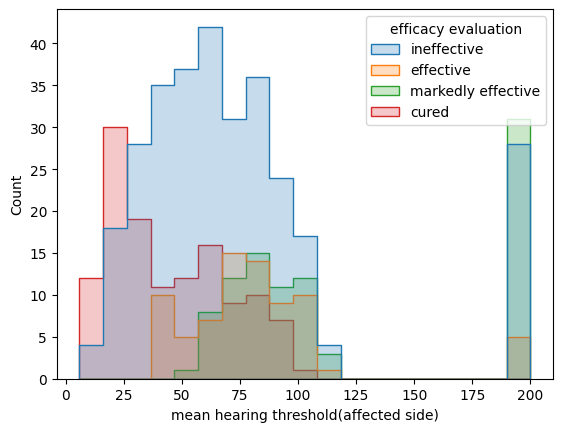

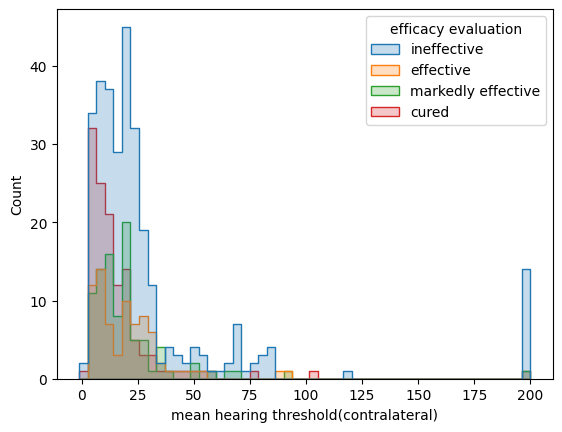

In [7]:
for column in consecutive_value_columns:
    _data = data[data[column] != '-']

    sns.histplot(data=_data, x=column, hue='efficacy evaluation', element="step")
    plt.savefig('../output/distribution/{}.pdf'.format(column), bbox_inches="tight")
    plt.show()

In [8]:
df = pd.DataFrame()
for column in data.columns.drop('efficacy evaluation'):
    _data = data[[column, 'efficacy evaluation']].copy()
    _data = data[data[column] == '-']

    _df = pd.crosstab(_data[column], _data['efficacy evaluation'], rownames=['feature']).reset_index()
    _df['feature'] = column
    _df.set_index('feature', inplace=True)
    df = pd.concat([df, _df])
df = df.fillna(0).astype(int)
df.to_csv('../output/distribution/missing_distribution.csv')
df

efficacy evaluation,ineffective,effective,markedly effective,cured
feature,,,,
white blood cells,20,7,2,3
hemoglobin,22,7,2,4
platelet,22,7,2,4
fibrinogen,19,8,4,4
cholesterol,17,2,2,3
height,15,1,5,1
weight,15,1,5,1
BMI,15,1,5,1
mean hearing threshold(contralateral),2,0,1,1
